# Homework 7


You are waiting on some datasets from different teams but the approval process may take some time. 

You have no intention to wait! You will generate some fake data to get started. 

Here are some info you expect from the management:
* Employees dataset contains employee id, name, lastname, phone, state (~ 10K records) (Use states of US east coast only) 
* Salary dataset contains employee id, department id, yearly salary
* Department dataset contains department id, department name (5-10 departments) 

Here are the questions expected to be answered:

1. Visualize the average salary of each department
1. Visualize the total number of employees living in each state for each department
1. Visualize salary distribution of different states
1. Visualize salary distribution of different departments

You can use faker library (but you don't have to): https://faker.readthedocs.io/en/master/

`Optional:` 

Try to make dataframes realistic. 
* Salary distribution as normal distribution
* Salary of different states can be higher for 5-10K compared to other states


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CREATING FAKE DATASET

## EMPLOYEE DATASET

In [2]:
import random
from random import choices 

State=['Connecticut','Delaware','Florida','Georgia','Maine','Maryland','Massachusetts','New Hampshire','New Jersy','New York','North Carolina','Pennsylvania','Rhode Island','South Carolina','Virginia']
print(len(State))

STATES = choices(State, k=10000)
print('Length:', len(STATES))
print(set(STATES))
print(len(set(STATES)))


15
Length: 10000
{'Rhode Island', 'New Hampshire', 'Delaware', 'New Jersy', 'Massachusetts', 'South Carolina', 'Maryland', 'New York', 'Maine', 'Virginia', 'Georgia', 'Connecticut', 'Florida', 'North Carolina', 'Pennsylvania'}
15


In [3]:
for a in State:
    print(a,STATES.count(a))

Connecticut 660
Delaware 738
Florida 644
Georgia 659
Maine 669
Maryland 673
Massachusetts 653
New Hampshire 615
New Jersy 712
New York 633
North Carolina 662
Pennsylvania 669
Rhode Island 686
South Carolina 701
Virginia 626


In [4]:
## employee id

EMPID = random.sample(range(10001,99999),10000)
EMPID
print(len(set(EMPID)))
EMPID[:5]

10000


[24201, 14666, 52349, 63886, 11649]

In [5]:
## phone 

Phone = random.sample(range(10000001,99999999),10000)
Phone
print(len(set(Phone)))
Phone[:5]

10000


[85278719, 81396993, 35726643, 38961515, 63780272]

In [6]:
!pip install Faker 


In [7]:
#Firstname of the Employee  

from faker.providers.person.en import Provider
Fstnames = list(set(Provider.first_names))
random.seed(44)
random.shuffle(Fstnames)
print(len(Fstnames))
print(Fstnames[:5])
Fstnames_2 = list(set(Provider.first_names))[:10000-6824]
random.seed(42)
random.shuffle(Fstnames_2)
print(len(Fstnames_2))
print(Fstnames_2[:5])

6824
['Reubin', 'Osborne', 'Alyssa', 'Lethia', 'Zoey']
3176
['Finley', 'Katlyn', 'Elder', 'Arne', 'Dayana']


In [8]:
Fstnames.extend(Fstnames_2)
random.shuffle(Fstnames)

print(len(Fstnames))
print(Fstnames[:5])

10000
['Danniel', 'Coralie', 'River', 'Rodrigo', 'Darry']


In [9]:
# lastname

from faker.providers.person.en import Provider

Lstnames = list(Provider.last_names)

random.seed(44)
random.shuffle(Lstnames)

print(len(Lstnames))
print(Fstnames[:5])

Lstnames = Lstnames*30
Lstnames = Lstnames[:10000]
random.shuffle(Lstnames)
print(len(Lstnames))
Lstnames[:5]

473
['Danniel', 'Coralie', 'River', 'Rodrigo', 'Darry']
10000


['Tromp', "D'Amore", 'Halvorson', 'Berge', 'Torp']

In [10]:
for a in [EMPID, Fstnames, Fstnames, Phone, STATES]:
    print('length:', len(a), 'unique:', len(set(a)))

length: 10000 unique: 10000
length: 10000 unique: 6824
length: 10000 unique: 6824
length: 10000 unique: 10000
length: 10000 unique: 15


In [11]:
## Employee Dataframe

Emp_df = pd.DataFrame({'EMPLOYEE ID':EMPID, 'NAME':Fstnames, 'LASTNAME':Lstnames, 'PHONE':Phone, 'STATE':STATES})
Emp_df.head()

,EMPLOYEE ID,NAME,LASTNAME,PHONE,STATE
0,24201,Danniel,Tromp,85278719,New York
1,14666,Coralie,D'Amore,81396993,New Hampshire
2,52349,River,Halvorson,35726643,Rhode Island
3,63886,Rodrigo,Berge,38961515,Delaware
4,11649,Darry,Torp,63780272,Florida


In [12]:
print(len(Emp_df))
Emp_df.isnull().sum()

10000


EMPLOYEE ID    0
NAME           0
LASTNAME       0
PHONE          0
STATE          0
dtype: int64

# SALARY DATASET

In [13]:
## department ID

DPT_ID = [random.randint(1,7) for a in range(10000)]

print(len(DPT_ID))
DPT_ID[:5]

10000


[7, 4, 7, 1, 3]

In [14]:
## salary anually 

Salary = [random.randint(50000,214000) for a in range(10000)]

print(len(Salary))
Salary[:5]

10000


[105355, 209417, 98478, 170477, 86713]

In [15]:
Salary_df = pd.DataFrame({'EMPLOYEE ID':EMPID, 'DEPARTMENT ID':DPT_ID, 'YEARLY SALARY':Salary})
Salary_df.head()

,EMPLOYEE ID,DEPARTMENT ID,YEARLY SALARY
0,24201,7,105355
1,14666,4,209417
2,52349,7,98478
3,63886,1,170477
4,11649,3,86713


In [16]:
print(len(Salary_df))
Salary_df.isnull().sum()

10000


EMPLOYEE ID      0
DEPARTMENT ID    0
YEARLY SALARY    0
dtype: int64

In [17]:
Salary_df['DEPARTMENT ID'].unique()

array([7, 4, 1, 3, 5, 6, 2])

# DEPARTMENT DATASET

In [18]:
DPT_ID = pd.DataFrame({'DEPARTMENT ID':list(range(1,8))})
DPT_ID

,DEPARTMENT ID
0,1
1,2
2,3
3,4
4,5
5,6
6,7


In [19]:
DEPARTMENT_DICT = {1:'Finance', 2:'Marketing', 3:'HR', 4:'IT', 4:'Sales', 5:'Procurement', 6:'Admin', 7:'Services'}

DPT_ID['DEPARTMENT NAME'] = DPT_ID['DEPARTMENT ID'].map(DEPARTMENT_DICT)

In [20]:
DPT_ID

,DEPARTMENT ID,DEPARTMENT NAME
0,1,Finance
1,2,Marketing
2,3,HR
3,4,Sales
4,5,Procurement
5,6,Admin
6,7,Services


# 1. Visualize the average salary of each department

In [21]:
Salary_df.columns

Index(['EMPLOYEE ID', 'DEPARTMENT ID', 'YEARLY SALARY'], dtype='object')

In [22]:
A1_DF = pd.merge(Salary_df, DPT_ID, how='left', on='DEPARTMENT ID')
A1_DF.head()

,EMPLOYEE ID,DEPARTMENT ID,YEARLY SALARY,DEPARTMENT NAME
0,24201,7,105355,Services
1,14666,4,209417,Sales
2,52349,7,98478,Services
3,63886,1,170477,Finance
4,11649,3,86713,HR


<Figure size 1080x720 with 0 Axes>

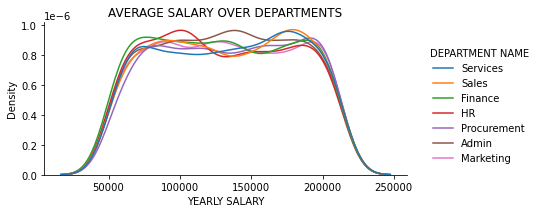

In [23]:
plt.figure(figsize=(15,10))

sns.displot(kind= 'kde', data=A1_DF, hue='DEPARTMENT NAME', x='YEARLY SALARY',height= 3, aspect = 2)
plt.title('AVERAGE SALARY OVER DEPARTMENTS')

plt.show()


We can see almost similar salaries for all departments.

# 2. Visualize the total number of employees living in each state for each department

In [24]:
Emp_df.columns

Index(['EMPLOYEE ID', 'NAME', 'LASTNAME', 'PHONE', 'STATE'], dtype='object')

In [25]:
A2_df = pd.merge(Salary_df, DPT_ID, how='left', on='DEPARTMENT ID')
A2_df.head()

,EMPLOYEE ID,DEPARTMENT ID,YEARLY SALARY,DEPARTMENT NAME
0,24201,7,105355,Services
1,14666,4,209417,Sales
2,52349,7,98478,Services
3,63886,1,170477,Finance
4,11649,3,86713,HR


In [26]:
A2_df = pd.merge(A2_df, Emp_df[['EMPLOYEE ID', 'STATE']], how='left', on='EMPLOYEE ID')
A2_df.head()

,EMPLOYEE ID,DEPARTMENT ID,YEARLY SALARY,DEPARTMENT NAME,STATE
0,24201,7,105355,Services,New York
1,14666,4,209417,Sales,New Hampshire
2,52349,7,98478,Services,Rhode Island
3,63886,1,170477,Finance,Delaware
4,11649,3,86713,HR,Florida


In [27]:
A2_df['STATE'].unique()

array(['New York', 'New Hampshire', 'Rhode Island', 'Delaware', 'Florida',
       'New Jersy', 'Massachusetts', 'Pennsylvania', 'North Carolina',
       'South Carolina', 'Georgia', 'Connecticut', 'Maine', 'Virginia',
       'Maryland'], dtype=object)

In [28]:
data=A2_df[(A2_df['STATE'] == 'New Hampshire') | (A2_df['STATE'] == 'Rhode Island') | 
                       (A2_df['STATE'] == 'Maine') |(A2_df['STATE'] == 'Delaware') | 
                       (A2_df['STATE'] == 'Massachusetts')].groupby(['STATE','DEPARTMENT ID']).count()
data.loc['Delaware':'Maine']

EMPLOYEE ID  YEARLY SALARY  DEPARTMENT NAME
STATE    DEPARTMENT ID                                             
Delaware 1                      103            103              103
         2                      109            109              109
         3                      111            111              111
         4                       91             91               91
         5                      107            107              107
         6                      116            116              116
         7                      101            101              101
Maine    1                       84             84               84
         2                       84             84               84
         3                       99             99               99
         4                       90             90               90
         5                      101            101              101
         6                      121            121              121
         7                       90             90               90

<Figure size 504x648 with 0 Axes>

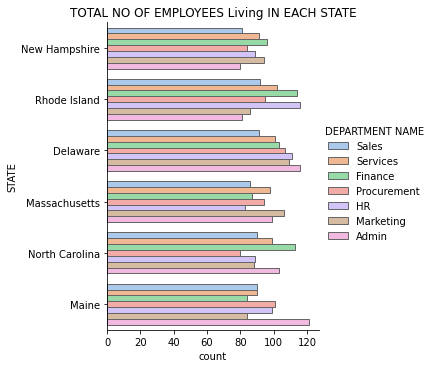

In [29]:
plt.figure(figsize=(7,9))

sns.catplot(y='STATE', hue='DEPARTMENT NAME', kind='count', edgecolor='0.4',
            palette='pastel',
            data=A2_df[(A2_df['STATE'] == 'New Jersey') | (A2_df['STATE'] == 'North Carolina') | 
                       (A2_df['STATE'] == 'Maine') |(A2_df['STATE'] == 'Delaware') | 
                       (A2_df['STATE'] == 'Massachusetts') | (A2_df['STATE'] == 'New Hampshire') | 
                       (A2_df['STATE'] == 'Rhode Island')])
plt.title('TOTAL NO OF EMPLOYEES Living IN EACH STATE')

plt.show()


<Figure size 504x648 with 0 Axes>

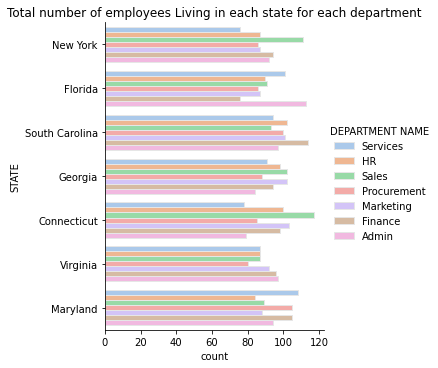

In [30]:
plt.figure(figsize=(7,9))

sns.catplot(y='STATE', hue='DEPARTMENT NAME', kind='count', edgecolor='0.9',
            palette='pastel',
            data=A2_df[(A2_df['STATE'] == 'Florida') |
                (A2_df['STATE'] == 'Virginia') | (A2_df['STATE'] == 'Connecticut') | 
                       (A2_df['STATE'] == 'New York') | (A2_df['STATE'] == 'Maryland') | 
                       (A2_df['STATE'] == 'South Carolina') |
      (A2_df['STATE'] == 'Georgia')])
plt.title('Total number of employees Living in each state for each department')

plt.show()

# 3. Visualize salary distribution of different states

In [31]:
A3_DF = pd.merge(Emp_df, Salary_df, how='left', on='EMPLOYEE ID')
A3_DF.head()

,EMPLOYEE ID,NAME,LASTNAME,PHONE,STATE,DEPARTMENT ID,YEARLY SALARY
0,24201,Danniel,Tromp,85278719,New York,7,105355
1,14666,Coralie,D'Amore,81396993,New Hampshire,4,209417
2,52349,River,Halvorson,35726643,Rhode Island,7,98478
3,63886,Rodrigo,Berge,38961515,Delaware,1,170477
4,11649,Darry,Torp,63780272,Florida,3,86713


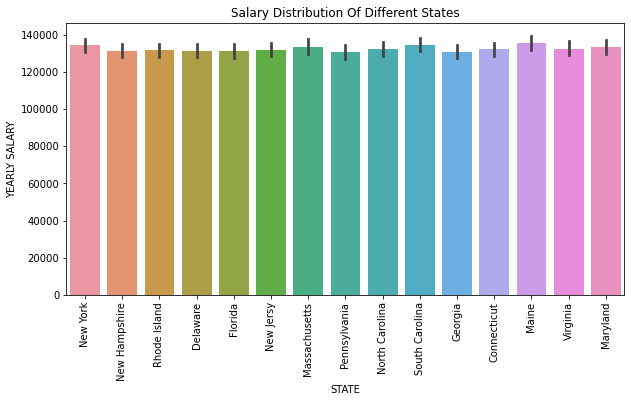

In [32]:
plt.figure(figsize=(10,5))

sns.barplot(x='STATE', y='YEARLY SALARY',data=A3_DF)

plt.title('Salary Distribution Of Different States')
plt.xticks(rotation=90)

plt.show()

# 4. Visualize salary distribution of different departments

In [33]:
A4_DF = pd.merge(Emp_df, Salary_df, how='left', on='EMPLOYEE ID')

A4_DF = pd.merge(A4_DF, DPT_ID, how='left', on='DEPARTMENT ID')
A4_DF.head()

,EMPLOYEE ID,NAME,LASTNAME,PHONE,STATE,DEPARTMENT ID,YEARLY SALARY,DEPARTMENT NAME
0,24201,Danniel,Tromp,85278719,New York,7,105355,Services
1,14666,Coralie,D'Amore,81396993,New Hampshire,4,209417,Sales
2,52349,River,Halvorson,35726643,Rhode Island,7,98478,Services
3,63886,Rodrigo,Berge,38961515,Delaware,1,170477,Finance
4,11649,Darry,Torp,63780272,Florida,3,86713,HR


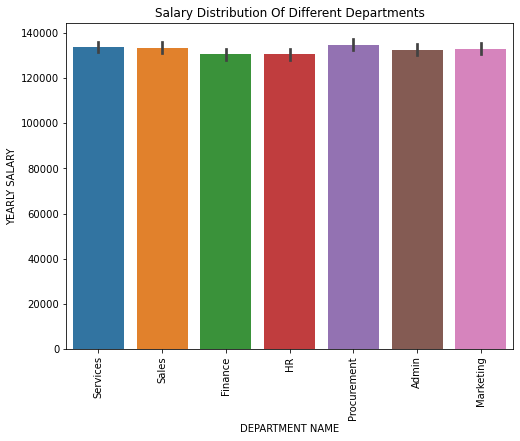

In [34]:
plt.figure(figsize=(8,6))

sns.barplot(x='DEPARTMENT NAME', y='YEARLY SALARY',data=A4_DF)

plt.title('Salary Distribution Of Different Departments')
plt.xticks(rotation=90)

plt.show()